In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

kickstarter_2018 = pd.read_csv("../../input/kickstarter-projects/ks-projects-201801.csv")

In [2]:
kickstarter_2018.shape

(378661, 15)

In [3]:
kickstarter_2018.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [4]:
kickstarter_2018[:5]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00


## Ejercicio 1:

Armar una tabla con todos los proyectos con nombres duplicados, ordenados para revisar agrupados.


In [5]:
## Filtro para obtener los duplicados quedandonos con todos (keep=False) y no solo el pimer duplicado.
projects_duplicated_by_name = kickstarter_2018[kickstarter_2018.name.duplicated()]
projects_duplicated_by_name.sort_values('name')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
342920,816998285,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-02-09,6500.00,2013-12-19 21:51:50,0.00,canceled,0,US,0.00,0.00,6500.00
322671,713417995,"""A Fresh Start""",Documentary,Film & Video,USD,2013-03-27,5000.00,2013-01-26 03:51:47,1417.00,failed,26,US,1417.00,1417.00,5000.00
265864,422509694,"""American Sports Stories"" - An Athletic Quest",Television,Film & Video,USD,2017-05-14,100000.00,2017-04-14 00:08:52,1.00,failed,1,US,25.00,1.00,100000.00
352573,866225086,"""City of Mercy"" (Canceled)",Film & Video,Film & Video,USD,2015-02-26,20000.00,2015-01-27 19:30:43,7248.00,canceled,9,US,7248.00,7248.00,20000.00
353421,870322805,"""Color"" Music Video",Music,Music,USD,2015-09-16,1100.00,2015-09-02 00:03:02,1100.00,undefined,0,"N,0""",nan,1100.00,1100.00
125533,1637334549,"""Cut From the Illest Cloth"" - The Brand New Fu...",Hip-Hop,Music,GBP,2014-03-04,14000.00,2014-02-02 16:00:57,225.00,canceled,7,GB,369.89,377.33,23478.12
129341,1656736114,"""ONE""",Apps,Technology,USD,2016-02-25,10000.00,2016-01-26 17:37:04,0.00,failed,0,US,0.00,0.00,10000.00
377887,996180421,"""On The Road""",Webseries,Film & Video,USD,2015-01-22,80000.00,2014-12-23 17:31:06,0.00,failed,0,US,0.00,0.00,80000.00
243132,306461885,"""Pulse""- a new album from ""Blind Focus"" to sup...",Music,Music,CAD,2016-12-08,4000.00,2016-11-08 03:01:36,270.00,canceled,3,CA,44.77,204.90,3035.59
284400,516801004,"""Reflections""",Shorts,Film & Video,USD,2012-10-16,3000.00,2012-09-16 07:47:47,0.00,failed,0,US,0.00,0.00,3000.00


## Ejercicio 2:

Verificar que los proyectos que tienen nombres duplicados también tienen el hash de nombre duplicado


In [6]:
from hashlib import md5
def hashit(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()

kickstarter_2018_name_hashes = kickstarter_2018['name'].apply(hashit)
kickstarter_2018_name_hashes.shape

(378661,)

In [7]:
projects_duplicated_by_name.shape

(2896, 15)

In [8]:
projects_duplicated_by_name_hashes = projects_duplicated_by_name['name'].apply(hashit)
kickstarter_2018_name_hashes[projects_duplicated_by_name_hashes].shape

(2896,)

Mismas cantidad de filas en <em>projects_duplicated_by_name</em> y <em>kickstarter_2018_name_hashes</em> son iguales. Concluimos que los hashes estan bien calculados.

## Ejercicio 3

Comparar la cantidad de nombres raros en kickstarter_2018 con la que obtenemos al cargar 'ks-projects-201801.csv' con encoding iso-8859-1.


In [9]:
import ftfy.badness as bad

def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)


kickstarter_2018['name_weirdness'] = kickstarter_2018['name'].apply(weird)
kickstarter_2018_weird = kickstarter_2018[kickstarter_2018['name_weirdness'] > 1]

In [10]:
kickstarter_2018_weird.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness
43626,1221990593,Support PMCD´s ¨From a Different Clay¨,Dance,Dance,USD,2011-06-08,1500.00,2011-04-28 05:15:32,1940.00,successful,27,US,1940.00,1940.00,1500.00,3
46055,1234089244,Cracking (Mastering) the Metaphor (Political)...,Nonfiction,Publishing,USD,2013-10-27,30000.00,2013-09-27 23:33:29,0.00,failed,0,US,0.00,0.00,30000.00,2
48637,124795481,µGALE (Canceled),Wearables,Technology,EUR,2015-04-17,18000.00,2015-02-16 01:55:34,10.00,canceled,2,NL,11.39,10.81,19465.14,2
92215,1468489999,µCurrent GOLD - Precision Multimeter Current A...,Hardware,Technology,AUD,2013-12-31,9900.00,2013-12-17 10:28:09,116575.17,successful,1268,AU,104343.69,104871.51,8906.08,2
120203,1610503461,µPeek - The Professional Microscope that Fits ...,Technology,Technology,CHF,2016-01-09,125000.00,2015-12-10 10:08:18,247688.14,successful,1435,CH,249249.19,246848.85,124576.44,2


In [11]:
kickstarter_2018_iso_8859_1 = pd.read_csv("../../input/kickstarter-projects/ks-projects-201801.csv",
                        index_col='ID',
                        parse_dates=['deadline','launched'],
                        encoding='iso-8859-1')

kickstarter_2018_iso_8859_1['name_weirdness'] = kickstarter_2018_iso_8859_1['name'].apply(weird)
kickstarter_2018_iso_8859_1_weird = kickstarter_2018_iso_8859_1[kickstarter_2018_iso_8859_1['name_weirdness'] > 1]
kickstarter_2018_iso_8859_1_weird.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1000235643,HIIT Bottleâ¢,Drinks,Food,USD,2015-04-27,15000.00,2015-03-13 18:33:08,124998.00,successful,2784,US,124998.00,124998.00,15000.00,2
1000260691,Gizbeeâ¢ Unlimited Removable Storage for Your...,Gadgets,Technology,USD,2016-03-25,87000.00,2016-02-29 20:30:27,2030.00,canceled,15,US,2030.00,2030.00,87000.00,2
1000519001,Wordwright: reÂ·deÂ·finÂ·ing word play,Tabletop Games,Games,USD,2015-12-29,2000.00,2015-11-21 14:12:27,14794.00,successful,624,US,14794.00,14794.00,2000.00,6
1000644119,OperaciÃ³n Douve,Action,Film & Video,EUR,2016-05-01,100.00,2016-03-02 19:09:05,20.00,failed,2,ES,21.77,22.85,114.27,2
1000767040,Strait Jacket â Tangle Prevention For Headph...,Product Design,Design,USD,2016-11-23,30000.00,2016-10-24 03:35:51,1041.00,canceled,46,US,549.00,1041.00,30000.00,4


In [12]:
print(kickstarter_2018_weird.shape)
print(kickstarter_2018_iso_8859_1_weird.shape)

(26, 16)
(7682, 15)


Vemos que el documento kickstarter_2018 abierto con iso_8859_1 contiene mayor cantidad de caracteres raros.

## Ejercicio 4

Codificar currency con ambas estrategias


In [13]:
column='currency'
kickstarter_2018[column].unique()

array(['GBP', 'USD', 'CAD', 'AUD', 'NOK', 'EUR', 'MXN', 'SEK', 'NZD',
       'CHF', 'DKK', 'HKD', 'SGD', 'JPY'], dtype=object)

In [14]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer

# Label Encoder
le = preprocessing.LabelEncoder()
le.fit(kickstarter_2018[column])
print(le.classes_)

['AUD' 'CAD' 'CHF' 'DKK' 'EUR' 'GBP' 'HKD' 'JPY' 'MXN' 'NOK' 'NZD' 'SEK'
 'SGD' 'USD']


In [15]:
# Label Binarizer
lb = LabelBinarizer()
lb_results = lb.fit_transform(kickstarter_2018[column])
lb_col_names = ((column + '_') + pd.Series(lb.classes_))

In [16]:
# Adding binarized columns
lb_df = pd.DataFrame(lb_results, columns=lb_col_names, index=kickstarter_2018.index)
kickstarter_2018 = kickstarter_2018.join(lb_df)

In [17]:
# Adding labeled column
new_col_name = column + "_le"
kickstarter_2018[new_col_name] = le.transform(kickstarter_2018[column]) 
kickstarter_2018[[column, new_col_name]+list(lb_col_names)].sample(10)

,currency,currency_le,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
48986,USD,13,0,0,0,0,0,0,0,0,0,0,0,0,0,1
160559,USD,13,0,0,0,0,0,0,0,0,0,0,0,0,0,1
77368,USD,13,0,0,0,0,0,0,0,0,0,0,0,0,0,1
70990,USD,13,0,0,0,0,0,0,0,0,0,0,0,0,0,1
104157,GBP,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0
55975,USD,13,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22986,GBP,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0
194387,GBP,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0
229961,USD,13,0,0,0,0,0,0,0,0,0,0,0,0,0,1
224142,USD,13,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [18]:
kickstarter_2018.shape

(378661, 31)

## Ejercicio 5

### 1. ¿Hay proyecto éxitosos que no consiguieron el objetivo? Si hay, ¿Qué porcentaje sí y cuál no?

In [19]:
mask_exitosos_sin_objetivo = (kickstarter_2018.state == 'successful') &  \
       (kickstarter_2018.pledged < kickstarter_2018.goal)
kickstarter_2018[mask_exitosos_sin_objetivo][["state", "pledged", "goal"]].shape

(5, 3)

In [20]:
mask_exitosos_con_objetivo = (kickstarter_2018.state == 'successful') &  \
       (kickstarter_2018.pledged >= kickstarter_2018.goal)
kickstarter_2018[mask_exitosos_con_objetivo][["state", "pledged", "goal"]].shape

(133951, 3)

In [21]:
mask_exitosos = (kickstarter_2018.state == 'successful')
total_exitos = kickstarter_2018[mask_exitosos].shape[0]
total_existos_sin_objetivo = kickstarter_2018[mask_exitosos_sin_objetivo].shape[0]
total_existos_con_objetivo = kickstarter_2018[mask_exitosos_con_objetivo].shape[0]
print("Porcenaje de proyectos exitosos que no consiguieron el objetivo: {0:.4%}".format(total_existos_sin_objetivo / total_exitos))
print("Porcenaje de proyectos exitosos que si consiguieron el objetivo: {0:.4%}".format(total_existos_con_objetivo / total_exitos))

Porcenaje de proyectos exitosos que no consiguieron el objetivo: 0.0037%
Porcenaje de proyectos exitosos que si consiguieron el objetivo: 99.9963%


### 2. Calcular una tabla con la cantidad de proyectos por categoría principal y estado.

In [22]:
import numpy as np

kickstarter_2018.pivot_table(index='state', columns='main_category', aggfunc=np.count_nonzero)

ID                                                         \
main_category      Art  Comics  Crafts   Dance   Design  Fashion Film & Video   
state                                                                           
canceled       2222.00  842.00  843.00  163.00  4152.00  2650.00      5755.00   
failed        14131.00 4036.00 5703.00 1235.00 14814.00 14182.00     32904.00   
live            194.00   76.00   76.00   18.00   305.00   250.00       332.00   
successful    11510.00 5842.00 2115.00 2338.00 10550.00  5593.00     23623.00   
suspended        96.00   23.00   72.00   13.00   247.00   138.00       117.00   
undefined          nan     nan     nan    1.00     2.00     3.00       854.00   

                                             ...   usd_pledged_real  \
main_category     Food    Games Journalism   ...            Fashion   
state                                        ...                      
canceled       2211.00  6202.00     523.00   ...            1726.00   
failed        15969.00 16003.00    3137.00   ...           10759.00   
live            184.00   287.00      31.00   ...             182.00   
successful     6085.00 12518.00    1012.00   ...            5593.00   
suspended       153.00   220.00      52.00   ...              95.00   
undefined          nan     1.00        nan   ...               3.00   

                                                                              \
main_category Film & Video     Food    Games Journalism    Music Photography   
state                                                                          
canceled           3681.00  1354.00  5213.00     249.00  1894.00      514.00   
failed            25823.00 12788.00 14530.00    2242.00 16512.00     4937.00   
live                245.00   152.00   267.00      24.00   222.00       38.00   
successful        23623.00  6085.00 12518.00    1012.00 24197.00     3305.00   
suspended            68.00    88.00   136.00      23.00    62.00       22.00   
undefined           655.00      nan     1.00        nan  1929.00        1.00   

                                             
main_category Publishing Technology Theater  
state                                        
canceled         2084.00    3449.00  385.00  
failed          17978.00   16591.00 3063.00  
live              217.00     297.00   35.00  
successful      12300.00    6434.00 6534.00  
suspended          35.00     350.00   12.00  
undefined         284.00       2.00    1.00  

[6 rows x 435 columns]

## Ejercicio 6

Calcular los valores atípicos de 'usd_goal_real' y graficar los boxplots, con y sin estos valores por categoría


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

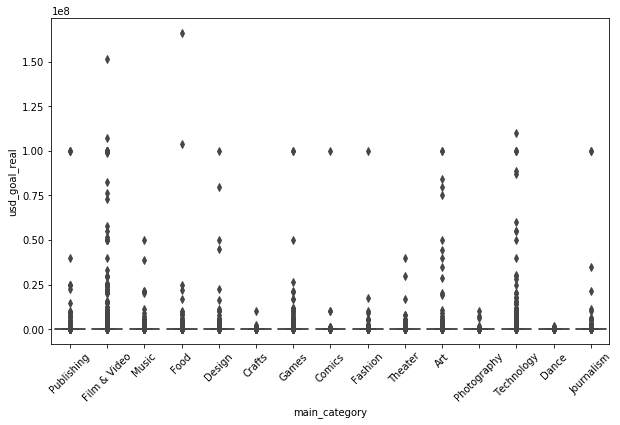

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x="main_category", y="usd_goal_real", data=kickstarter_2018)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

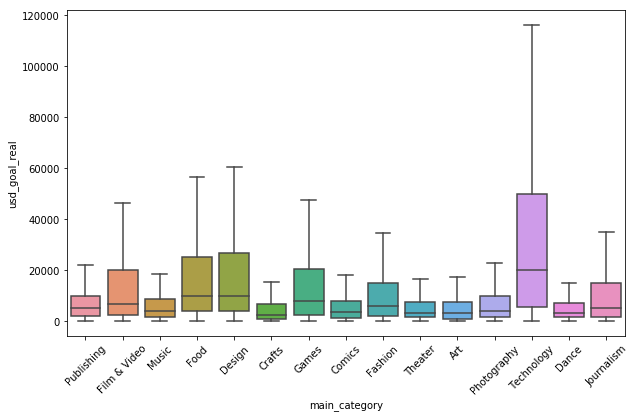

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x="main_category", y="usd_goal_real", data=kickstarter_2018, showfliers=False)
plt.xticks(rotation=45)

In [26]:
outliers = kickstarter_2018[kickstarter_2018.usd_goal_real > (kickstarter_2018.usd_goal_real.mean() + 
                                                            3 * kickstarter_2018.usd_goal_real.std())]
outliers

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,currency_le
1795,1009207145,** GOLIATH **,Product Design,Design,CAD,2014-07-21,3850000.00,2014-06-21 22:34:21,285.00,failed,...,0,0,0,0,0,0,0,0,0,1
2993,1015466274,Genesis,Film & Video,Film & Video,EUR,2015-09-01,5000000.00,2015-07-07 21:14:52,0.00,failed,...,0,0,0,0,0,0,0,0,0,4
3140,1016210580,INDIRA – THE FIRST INDIAN GRAND MUSICAL,Musical,Theater,EUR,2016-04-27,15000000.00,2016-02-27 13:08:01,15.00,failed,...,0,0,0,0,0,0,0,0,0,4
5076,1025947904,Long island city new york art book (Canceled),Photography,Photography,USD,2013-11-07,10000000.00,2013-10-08 23:16:26,0.00,canceled,...,0,0,0,0,0,0,0,0,1,13
5759,1029500715,Harambe World's Tallest Statue,Public Art,Art,USD,2016-11-25,20000000.00,2016-09-26 18:08:01,1.00,canceled,...,0,0,0,0,0,0,0,0,1,13
6161,1031487313,Music app ( Pupilize) is the next big thing fo...,Music,Music,USD,2017-02-07,5000000.00,2017-01-08 06:49:52,0.00,failed,...,0,0,0,0,0,0,0,0,1,13
9157,1046235166,Duel,Science Fiction,Film & Video,USD,2016-03-06,10000000.00,2016-01-06 15:00:11,100.00,failed,...,0,0,0,0,0,0,0,0,1,13
10449,1052555922,Cloud Based Project Analytics Dashboards,Software,Technology,USD,2017-03-05,10000000.00,2017-03-04 01:25:03,25.00,failed,...,0,0,0,0,0,0,0,0,1,13
12517,1062809925,Turn a Blind Eye,Narrative Film,Film & Video,GBP,2014-02-21,4000000.00,2013-12-23 22:36:10,0.00,failed,...,1,0,0,0,0,0,0,0,0,5
13803,106947703,Help FYFC Podcasts Buy a Harrier,Documentary,Film & Video,CAD,2014-10-21,4000000.00,2014-08-22 05:07:15,0.00,failed,...,0,0,0,0,0,0,0,0,0,1


In [27]:
print("# filas sin filtro de outliers: {}".format(kickstarter_2018.shape[0]))
print("# filas con filtro de outliers: {}".format(kickstarter_2018.drop(outliers.index).shape[0]))

# filas sin filtro de outliers: 378661
# filas con filtro de outliers: 378289


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

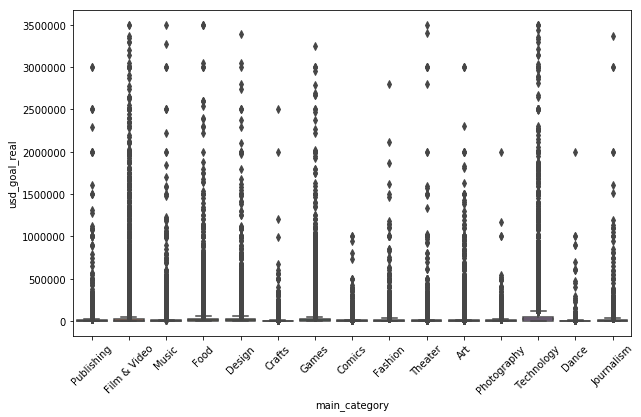

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x="main_category", y="usd_goal_real", data=kickstarter_2018.drop(outliers.index))
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

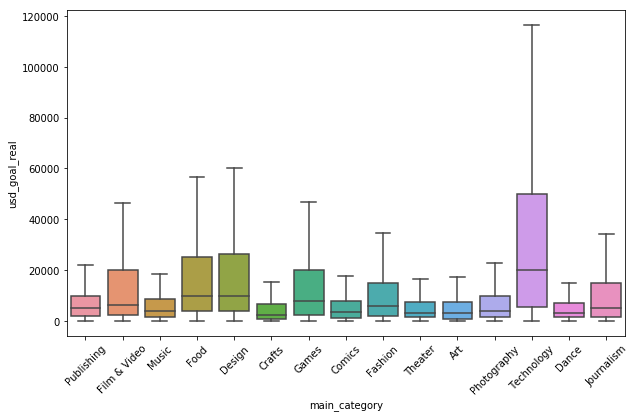

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x="main_category", y="usd_goal_real", data=kickstarter_2018.drop(outliers.index), showfliers=False)
plt.xticks(rotation=45)